In [23]:
### Import Locomotion ###
import sys
import os
PATH_TO_DIRECTORY = os.getcwd()
PATH_TO_DATA_DIRECTORY = os.getcwd() + "/data/"
sys.path.append(os.path.dirname(PATH_TO_DIRECTORY) + "/locomotion_package/") # Path to Locomotion Package
import locomotion
import json
from colour import Color
import matplotlib.patches as mpatches

### Import Other Packages ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### Constants ###
NUM_CURVES = 11
ZFILL_LEN = int(np.ceil(np.log10(NUM_CURVES)))

# Plotting values for Frame Rate

In [24]:
norm_mode = 'spec'
start_time, end_time = 0, 1

all_animals_fr1 = []
all_animals_fr2 = []

for curve_no in range(NUM_CURVES):
    curve_str = str(curve_no).zfill(ZFILL_LEN)
    json_path = PATH_TO_DATA_DIRECTORY + "FR_json1_data/CRV_{}.json".format(curve_str)
    # Load all animals
    animals = locomotion.getAnimalObjs(json_path)
    for a in animals:
        locomotion.trajectory.getCurveData(a)
    all_animals_fr1.append(animals)
    
for curve_no in range(NUM_CURVES):
    curve_str = str(curve_no).zfill(ZFILL_LEN)
    json_path = PATH_TO_DATA_DIRECTORY + "FR_json2_data/CRV_{}.json".format(curve_str)
    # Load all animals
    animals = locomotion.getAnimalObjs(json_path)
    for a in animals:
        locomotion.trajectory.getCurveData(a)
    all_animals_fr2.append(animals)

LOG: Extracting coordinates for Animal FR_TEST1_CRV_00_FR_06...
LOG: Extracting coordinates for Animal FR_TEST1_CRV_00_FR_09...
LOG: Extracting coordinates for Animal FR_TEST1_CRV_00_FR_12...
LOG: Extracting coordinates for Animal FR_TEST1_CRV_00_FR_15...
LOG: Extracting coordinates for Animal FR_TEST1_CRV_00_FR_18...
LOG: Extracting coordinates for Animal FR_TEST1_CRV_00_FR_21...
LOG: Extracting coordinates for Animal FR_TEST1_CRV_00_FR_24...
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: Extracting coordinates for Animal FR_TEST1_

LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: Extracting coordinates for Animal FR_TEST1_CRV_10_FR_06...
LOG: Extracting coordinates for Animal FR_TEST1_CRV_10_FR_09...
LOG: Extracting coordinates for Animal FR_TEST1_CRV_10_FR_12...
LOG: Extracting coordinates for Animal FR_TEST1_CRV_10_FR_15...
LOG: Extracting coordinates for Animal FR_TEST1_CRV_10_FR_18...
LOG: Extracting coordinates for Animal FR_TEST1_CRV_10_FR_21...
LOG: Extracting coordinates for Animal FR_TEST1_CRV_10_FR_24...
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(

LOG: Extracting coordinates for Animal FR_TEST2_CRV_07_FR_84...
LOG: Extracting coordinates for Animal FR_TEST2_CRV_07_FR_96...
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: Extracting coordinates for Animal FR_TEST2_CRV_08_FR_24...
LOG: Extracting coordinates for Animal FR_TEST2_CRV_08_FR_36...
LOG: Extracting coordinates for Animal FR_TEST2_CRV_08_FR_48...
LOG: Extracting coordinates for Animal FR_TEST2_CRV_08_FR_60...
LOG: Extracting coordinates for Animal FR_TEST2_CRV_08_FR_72...
LOG: Extracting coordinates for Animal FR_TEST2_

In [25]:
# First animal - frame rates at [24, 36, 48, 60, 72, 84, 96]
animals

# Generic Plotting Function

In [26]:
# Same animal, different frame rate/resolution
def plotVarForAnimal(animals, a_no, var_plot, var_test):
    if var_test == 'FR':
        title = "Frame Rates"
        test_vars = [a.frame_rate for a in animals]

    elif var_test == "RES":
        title = "Resolutions"
        test_vars = [a.pix for a in animals]

    no_of_tests = len(animals)
    red = Color("red")
    colors = list(red.range_to(Color("yellow"),no_of_tests))
    patches = []
    
    for i, a in enumerate(animals):
        time_increment = (a.end - a.start)/(60 * a.frame_rate)
        colour = colors[i].rgb
        x = np.arange(a.start, a.end, time_increment)
        y = a.getRawVals(var_plot)
        plt.plot(x, y, color = colour)
        plt.title( title + " for " + var_plot + " of Animal " + str(a_no))
        patch = mpatches.Patch(color = colour, label = var_test + str(test_vars[i]))
        patches.append(patch)

    plt.legend(handles = patches)
    plt.show()

# Plots for frame rates 6 to 24

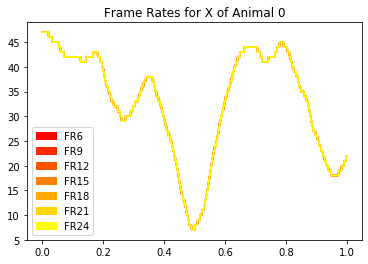

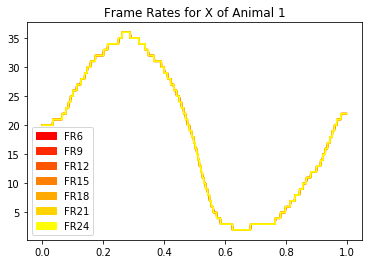

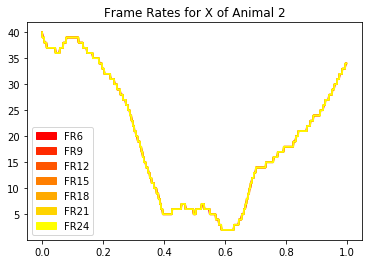

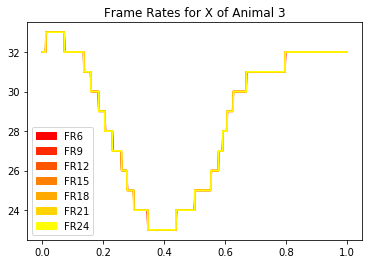

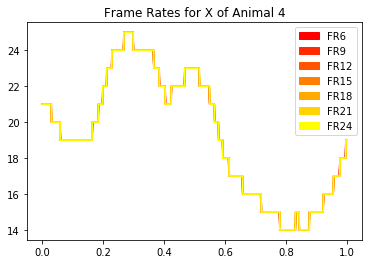

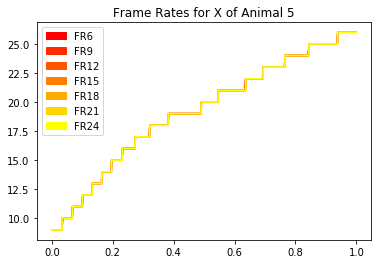

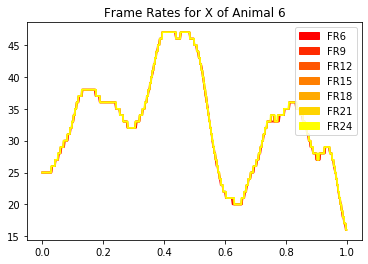

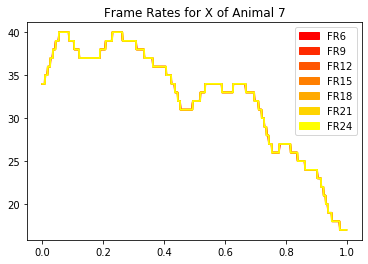

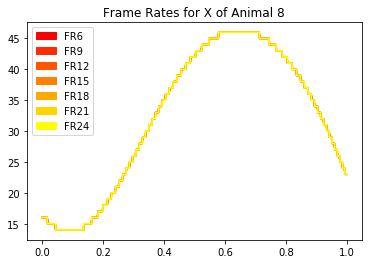

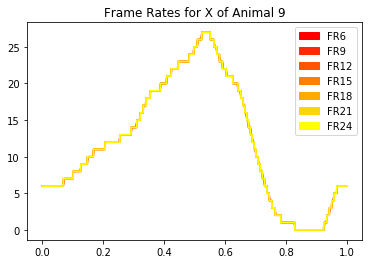

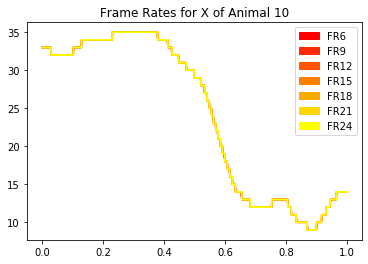

In [27]:
for i, animal_ls in enumerate(all_animals_fr1):
    plotVarForAnimal (animal_ls, i, 'X', 'FR')

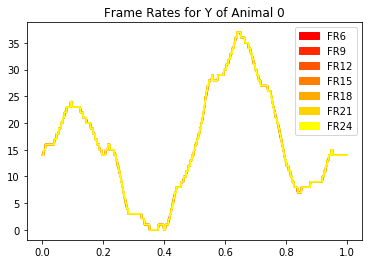

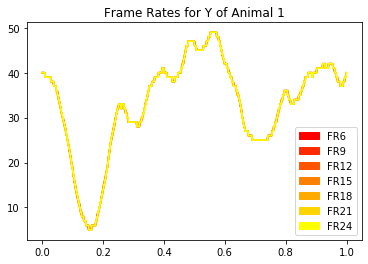

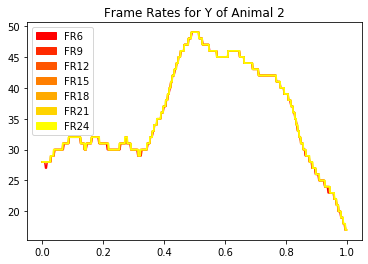

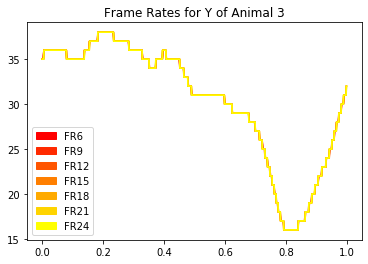

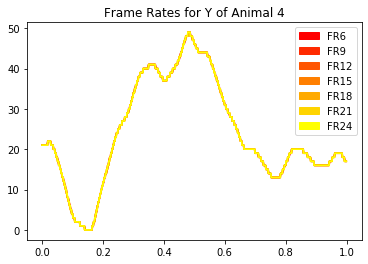

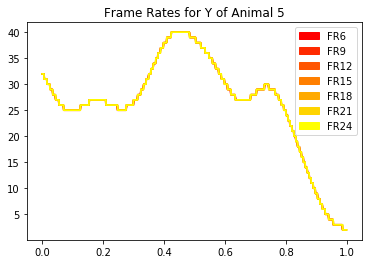

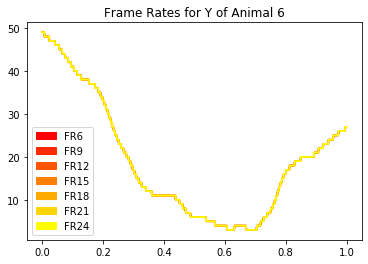

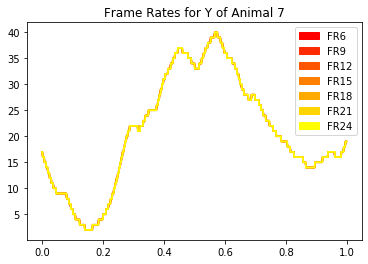

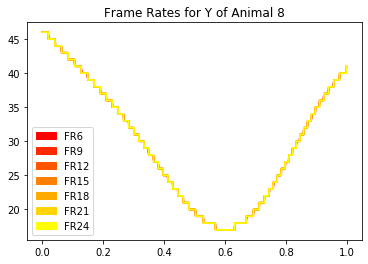

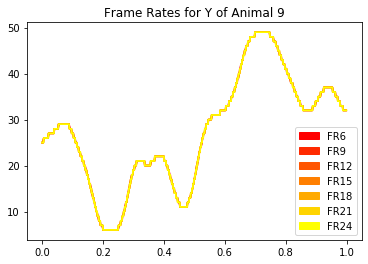

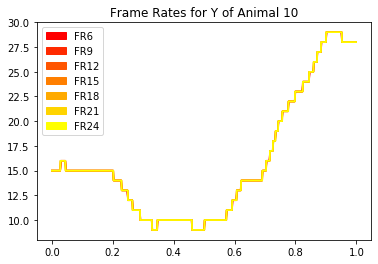

In [28]:
for i, animal_ls in enumerate(all_animals_fr1):
    plotVarForAnimal (animal_ls, i, 'Y', 'FR')

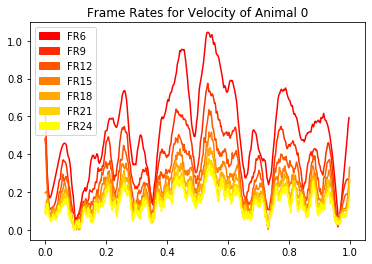

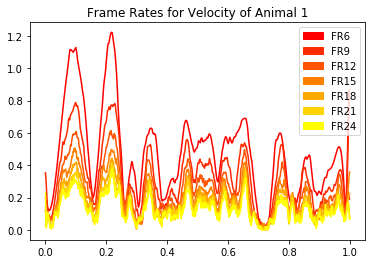

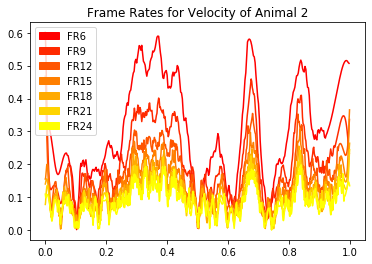

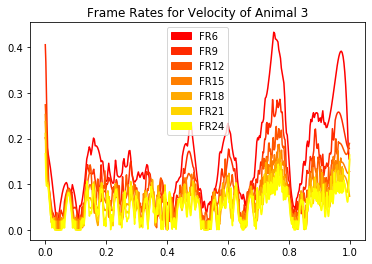

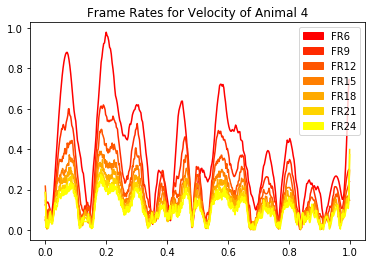

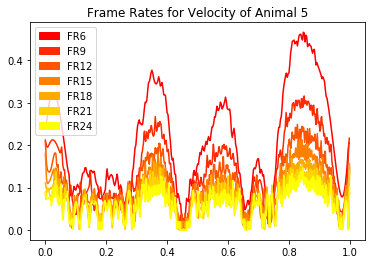

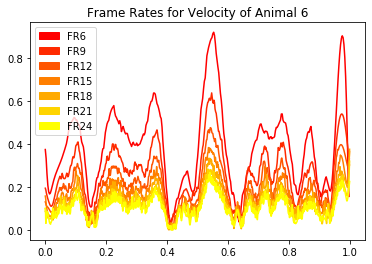

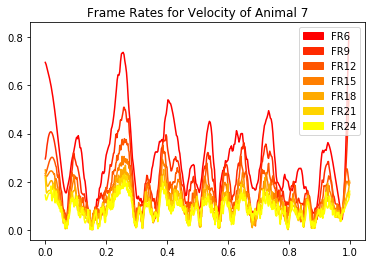

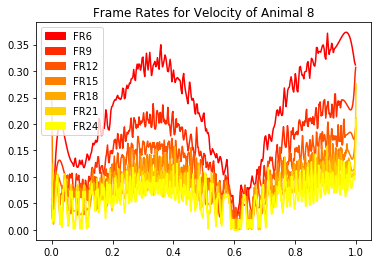

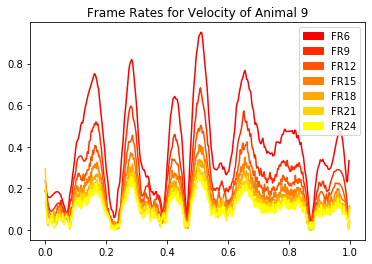

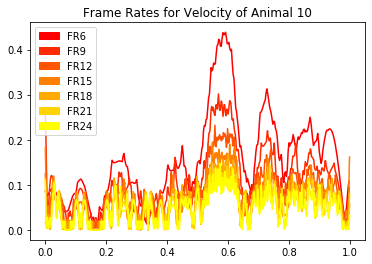

In [29]:
for i, animal_ls in enumerate(all_animals_fr1):
    plotVarForAnimal (animal_ls, i, 'Velocity', 'FR')

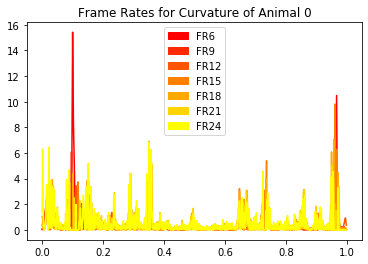

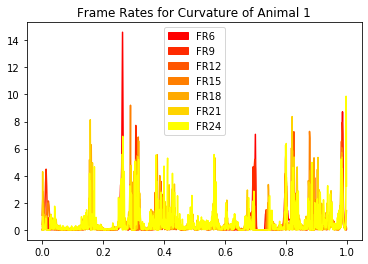

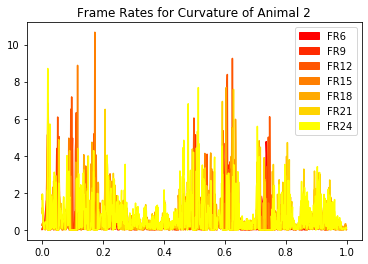

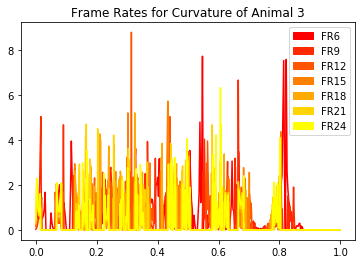

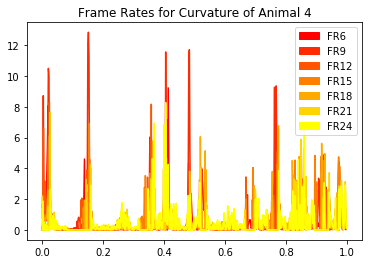

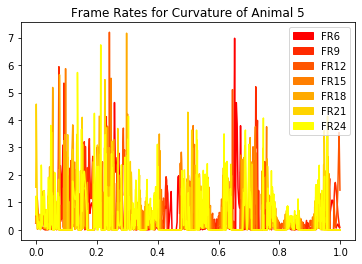

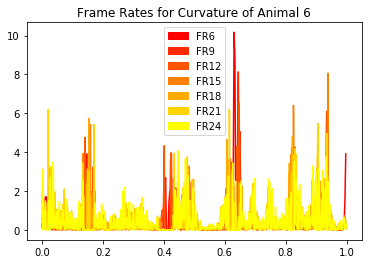

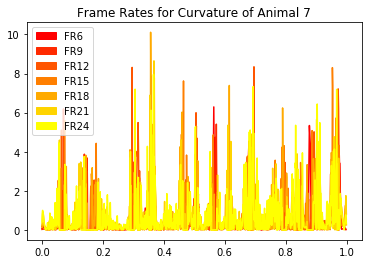

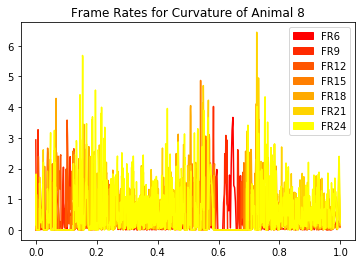

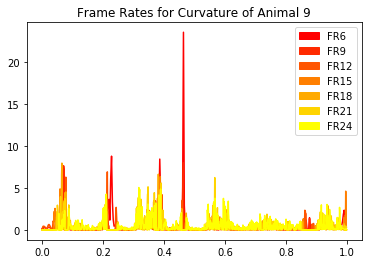

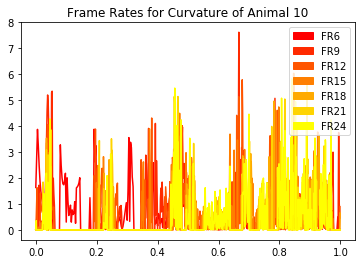

In [30]:
for i, animal_ls in enumerate(all_animals_fr1):
    plotVarForAnimal (animal_ls, i, 'Curvature', 'FR')

# Plots for frame rates 24 to 96


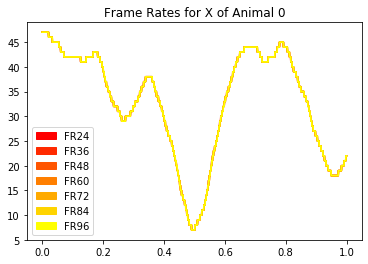

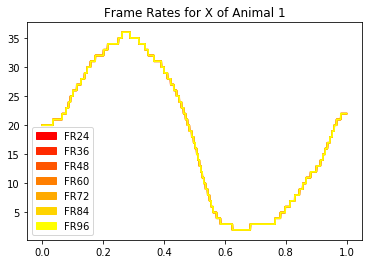

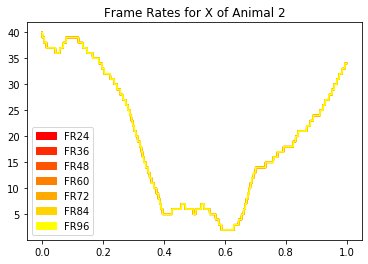

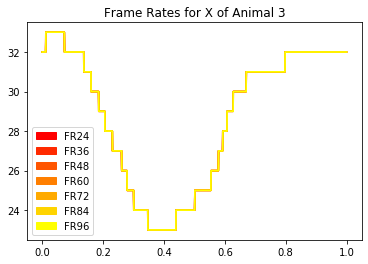

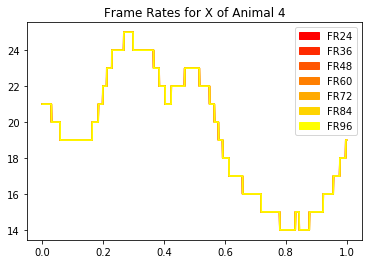

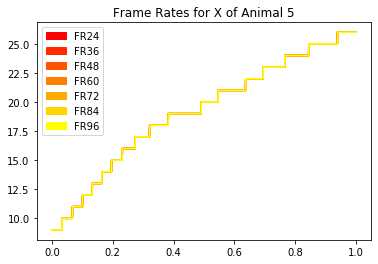

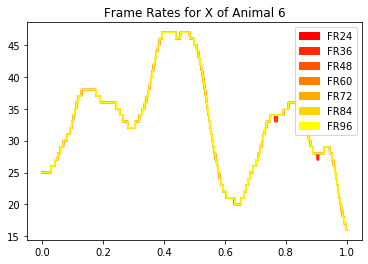

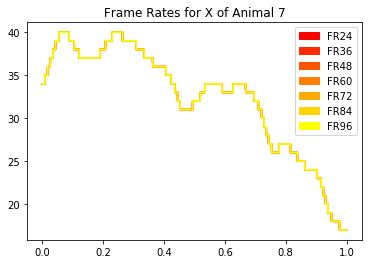

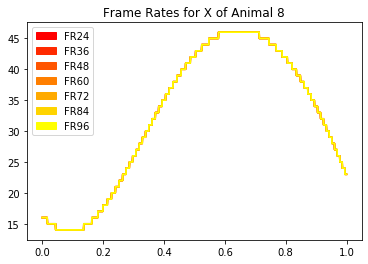

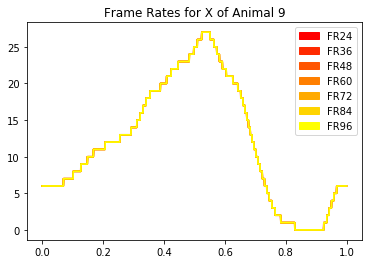

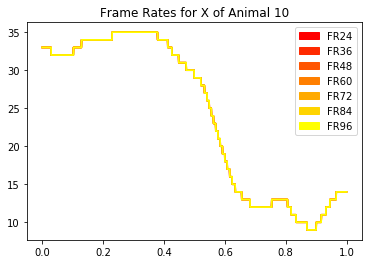

In [31]:
for i, animal_ls in enumerate(all_animals_fr2):
    plotVarForAnimal (animal_ls, i, 'X', 'FR')

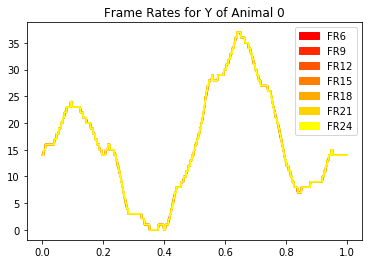

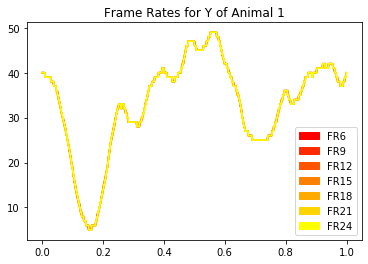

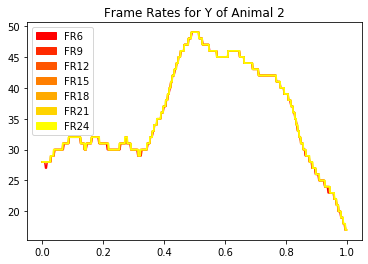

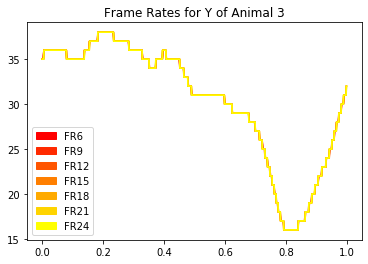

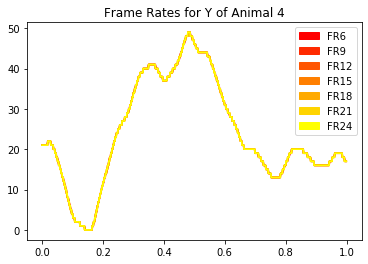

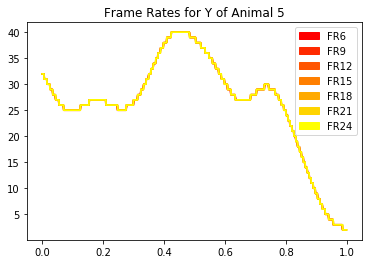

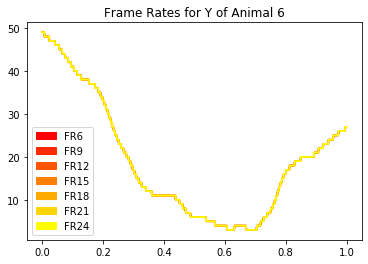

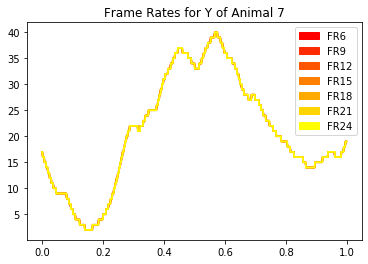

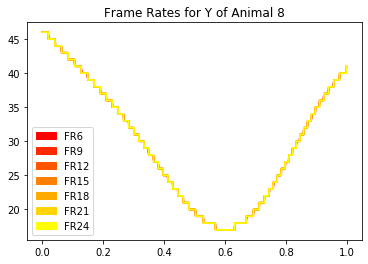

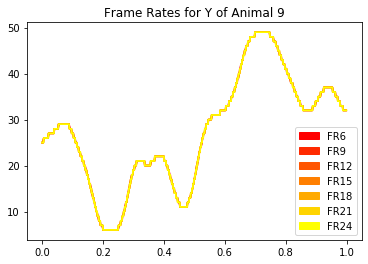

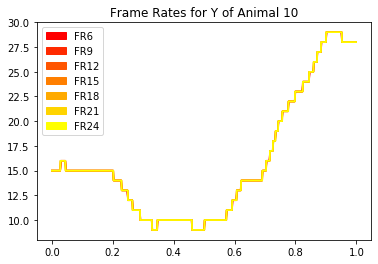

In [32]:
for i, animal_ls in enumerate(all_animals_fr1):
    plotVarForAnimal (animal_ls, i, 'Y', 'FR')

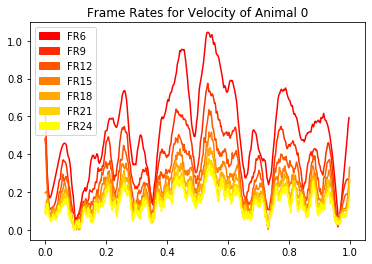

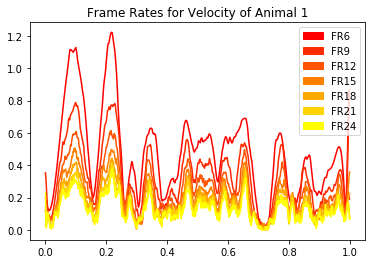

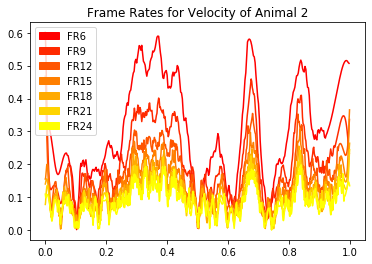

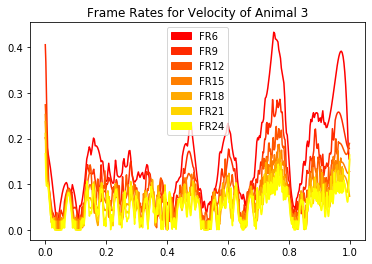

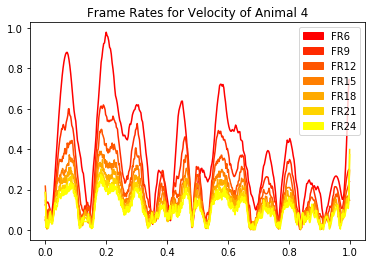

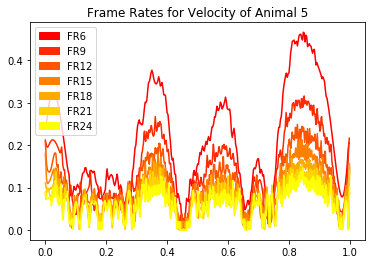

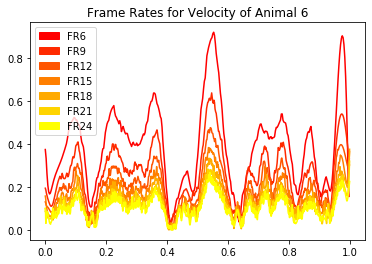

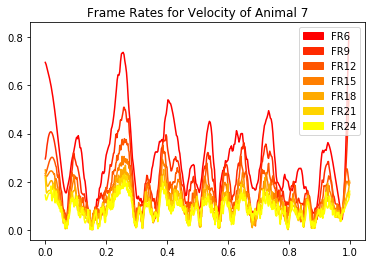

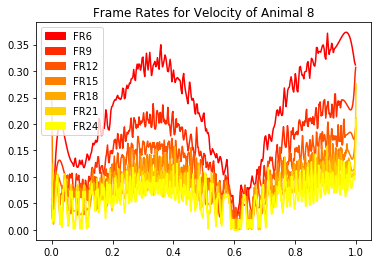

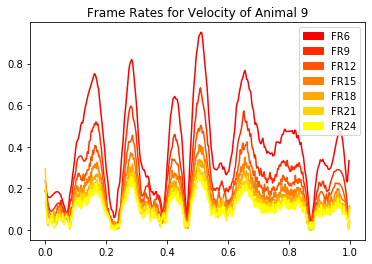

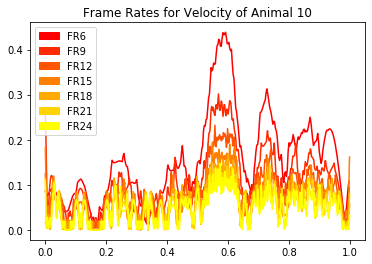

In [33]:
for i, animal_ls in enumerate(all_animals_fr1):
    plotVarForAnimal (animal_ls, i, 'Velocity', 'FR')

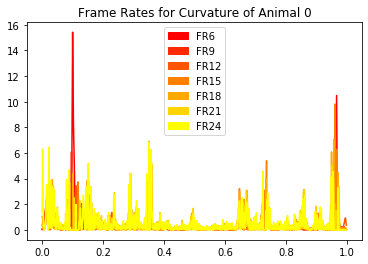

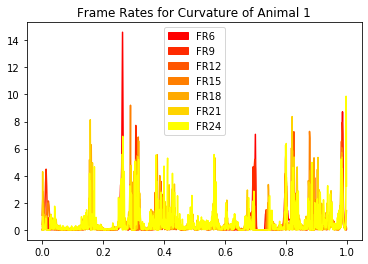

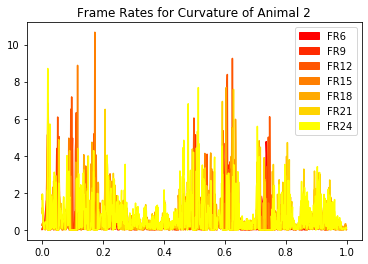

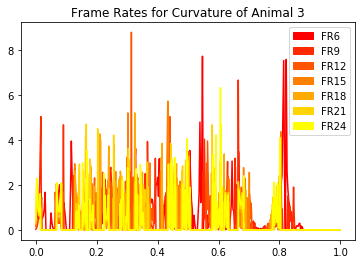

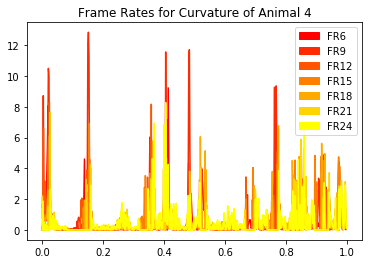

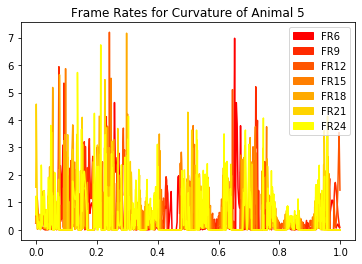

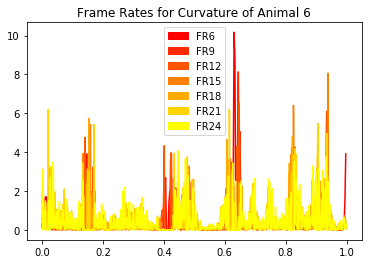

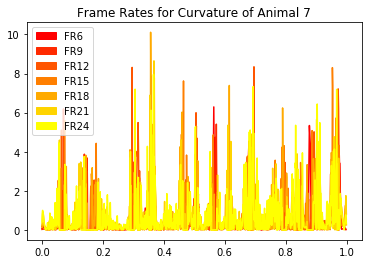

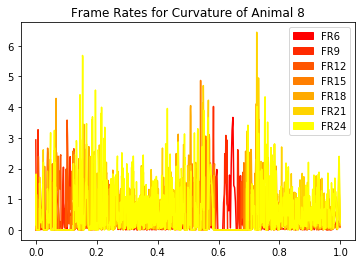

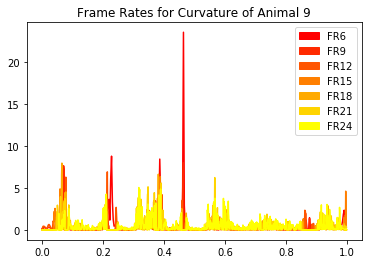

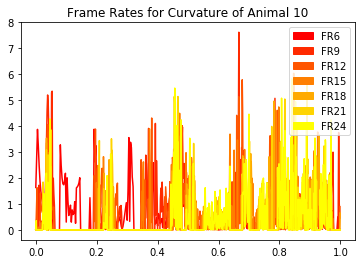

In [34]:
for i, animal_ls in enumerate(all_animals_fr1):
    plotVarForAnimal (animal_ls, i, 'Curvature', 'FR')

# Plotting values for Resolution

In [35]:
norm_mode = 'spec'
start_time, end_time = 0, 1

all_animals_res1 = []
all_animals_res2 = []

for curve_no in range(NUM_CURVES):
    curve_str = str(curve_no).zfill(ZFILL_LEN)
    json_path = PATH_TO_DATA_DIRECTORY + "RES_json1_data/CRV_{}.json".format(curve_str)
    # Load all animals
    animals = locomotion.getAnimalObjs(json_path)
    for a in animals:
        locomotion.trajectory.getCurveData(a)
    all_animals_res1.append(animals)
    
for curve_no in range(NUM_CURVES):
    curve_str = str(curve_no).zfill(ZFILL_LEN)
    json_path = PATH_TO_DATA_DIRECTORY + "RES_json2_data/CRV_{}.json".format(curve_str)
    # Load all animals
    animals = locomotion.getAnimalObjs(json_path)
    for a in animals:
        locomotion.trajectory.getCurveData(a)
    all_animals_res2.append(animals)

LOG: Extracting coordinates for Animal RES_TEST1_CRV_00_RES_0.5...
LOG: Extracting coordinates for Animal RES_TEST1_CRV_00_RES_0.75...
LOG: Extracting coordinates for Animal RES_TEST1_CRV_00_RES_01...
LOG: Extracting coordinates for Animal RES_TEST1_CRV_00_RES_1.25...
LOG: Extracting coordinates for Animal RES_TEST1_CRV_00_RES_1.5...
LOG: Extracting coordinates for Animal RES_TEST1_CRV_00_RES_1.75...
LOG: Extracting coordinates for Animal RES_TEST1_CRV_00_RES_02...
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: Extracting coordinate

LOG: Extracting coordinates for Animal RES_TEST1_CRV_10_RES_02...
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: smooth(X) :: SMOOTH_RANGE = 53
LOG: Extracting coordinates for Animal RES_TEST2_CRV_00_RES_02...
LOG: Extracting coordinates for Animal RES_TEST2_CRV_00_RES_03...
LOG: Extracting coordinates for Animal RES_TEST2_CRV_00_RES_04...
LOG: Extracting coordinates for Animal RES_TEST2_CRV_00_RES_05...
LOG: Extracting coordinates for Animal RES_TEST2_CRV_00_RES_06...
LOG: Extracting coordinates for Animal RES_TEST2_CRV_00_RES_07...
LOG: Extracting coordinates for An

LOG: smooth(X) :: SMOOTH_RANGE = 53


# Plots for Resolutions 0.5 to 2

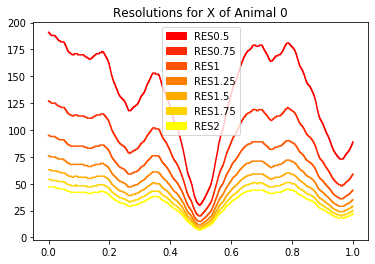

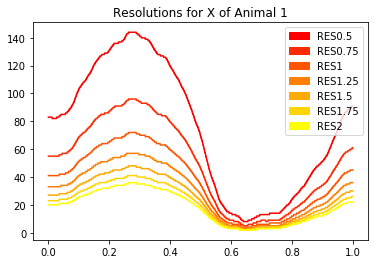

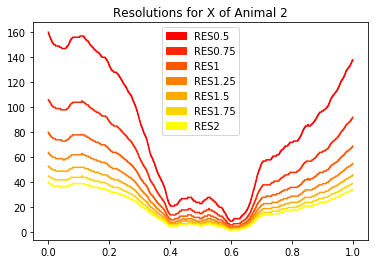

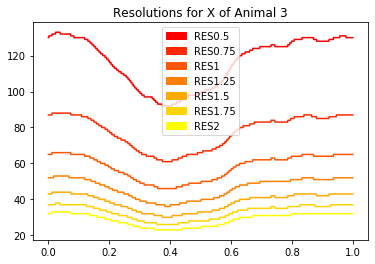

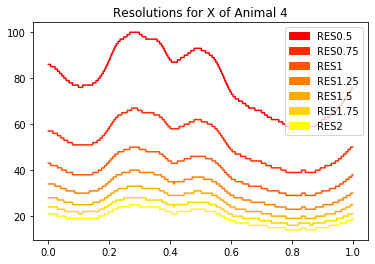

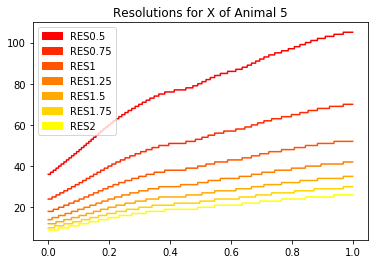

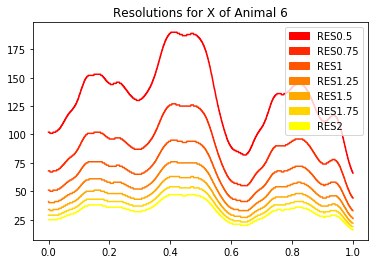

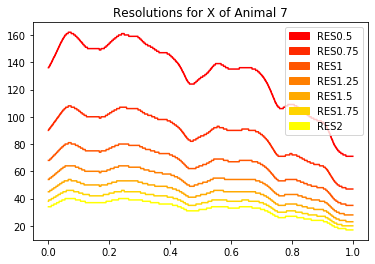

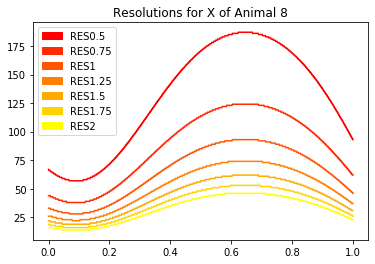

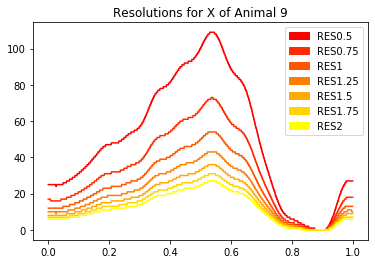

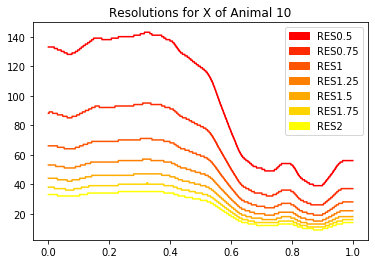

In [36]:
for i, animal_ls in enumerate(all_animals_res1):
    plotVarForAnimal (animal_ls, i, 'X', 'RES')

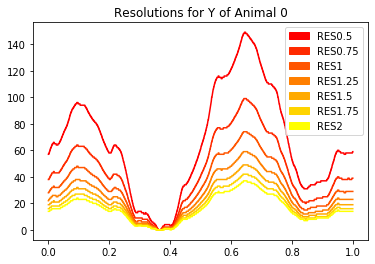

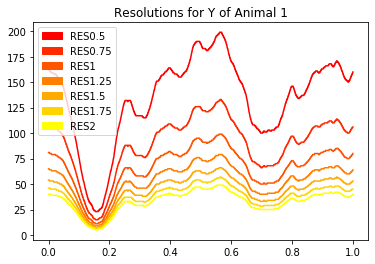

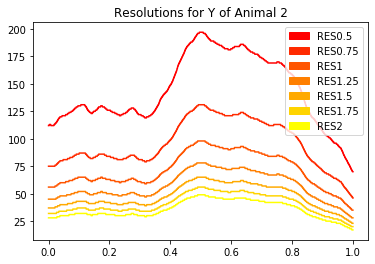

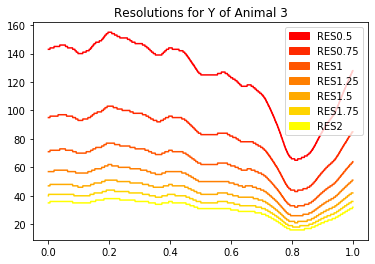

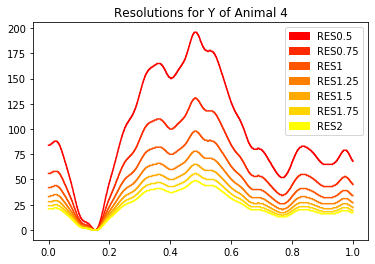

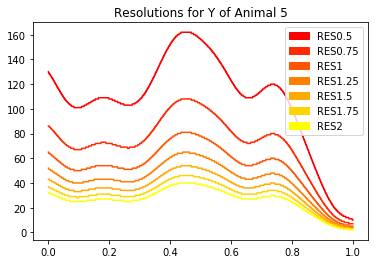

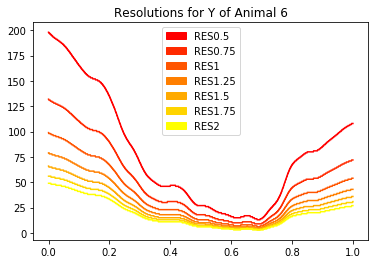

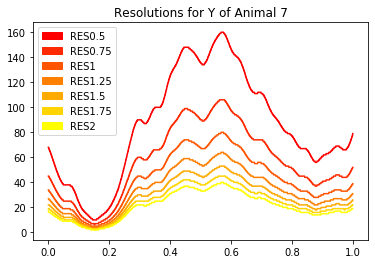

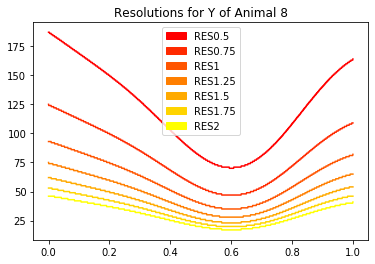

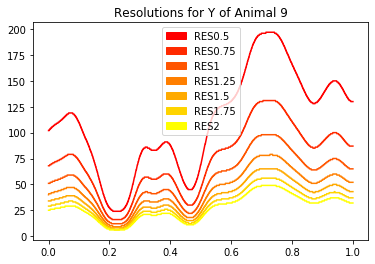

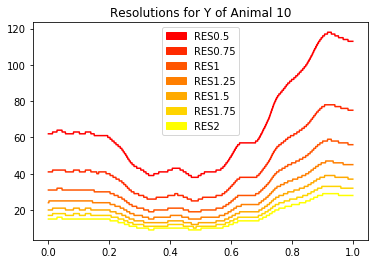

In [37]:
for i, animal_ls in enumerate(all_animals_res1):
    plotVarForAnimal (animal_ls, i, 'Y', 'RES')

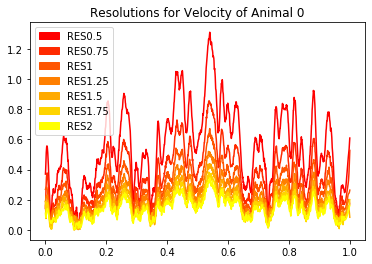

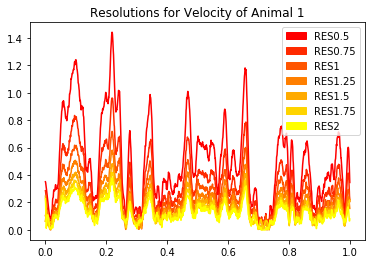

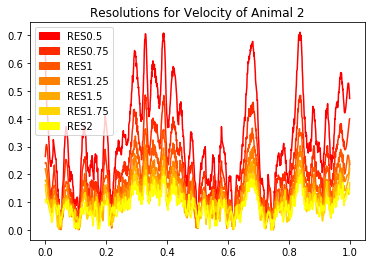

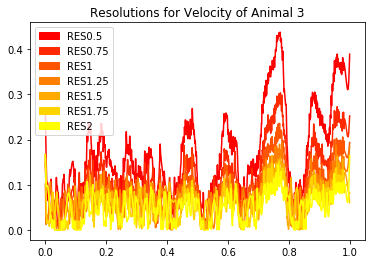

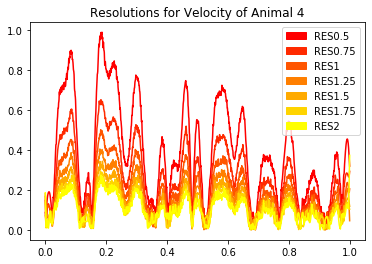

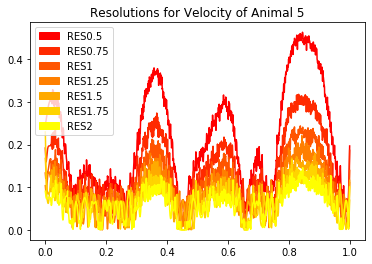

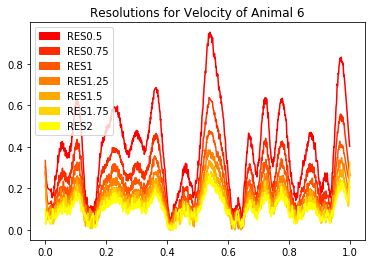

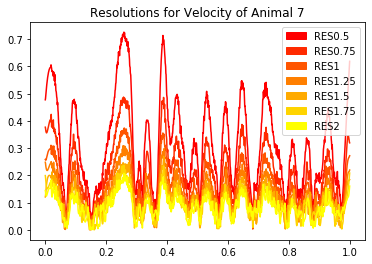

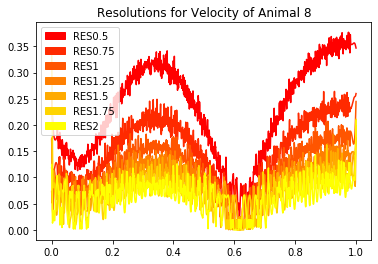

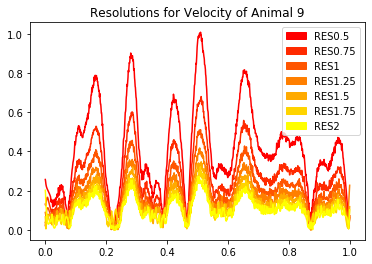

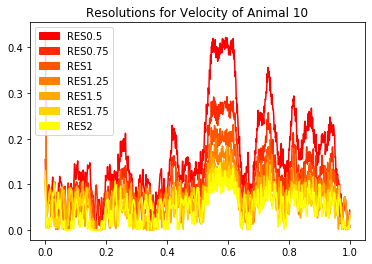

In [38]:
for i, animal_ls in enumerate(all_animals_res1):
    plotVarForAnimal (animal_ls, i, 'Velocity', 'RES')

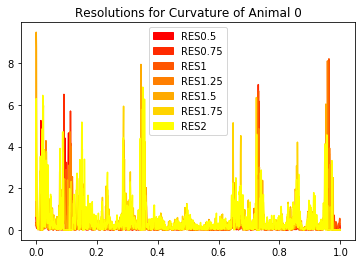

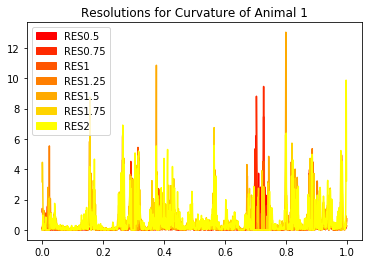

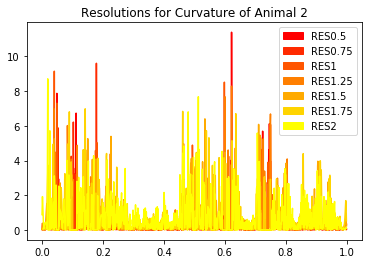

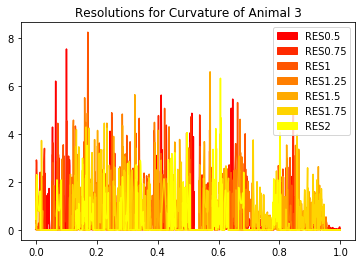

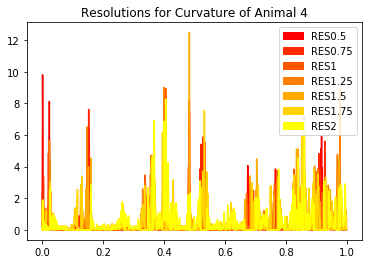

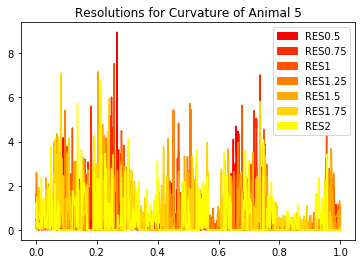

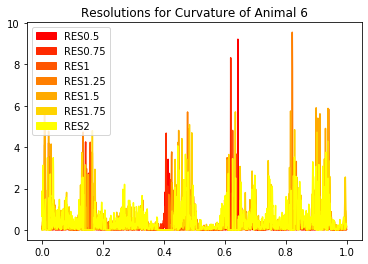

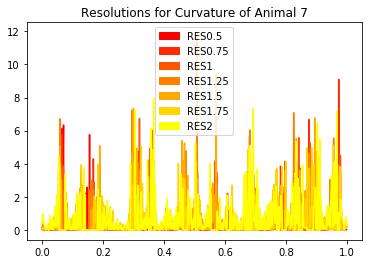

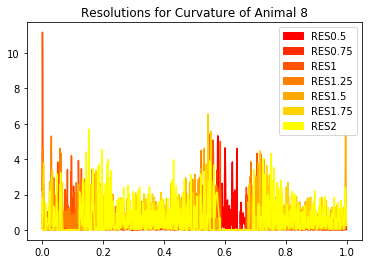

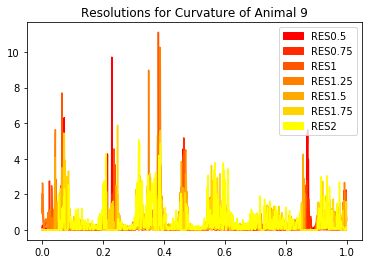

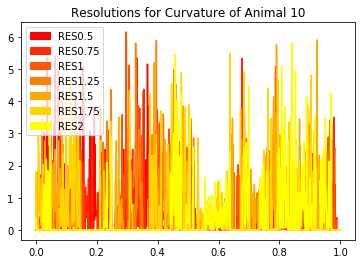

In [39]:
for i, animal_ls in enumerate(all_animals_res1):
    plotVarForAnimal (animal_ls, i, 'Curvature', 'RES')

# Plots for Resolutions 2 to 8


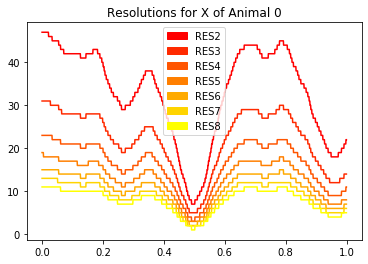

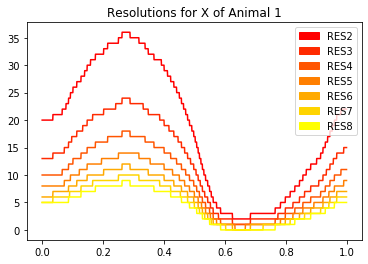

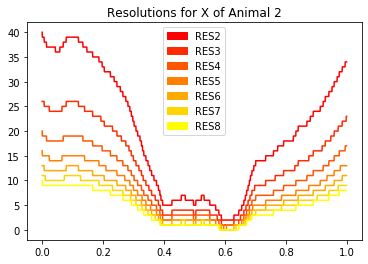

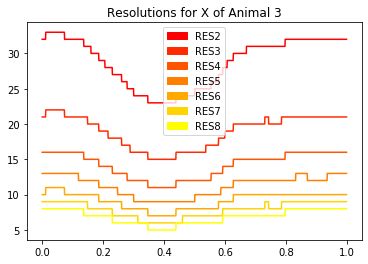

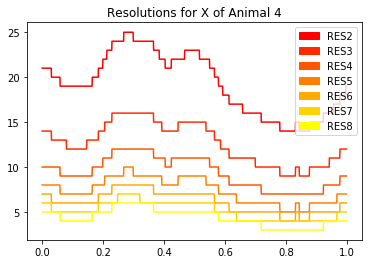

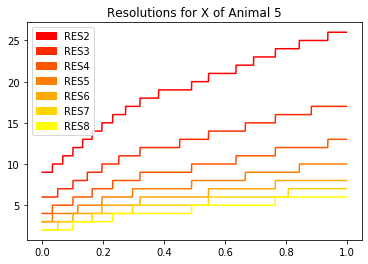

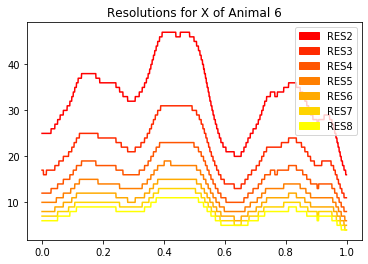

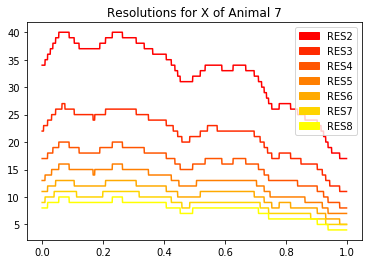

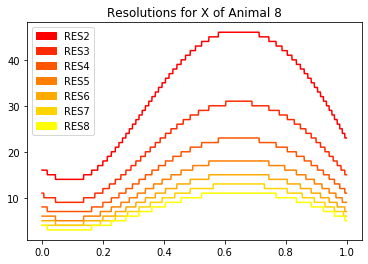

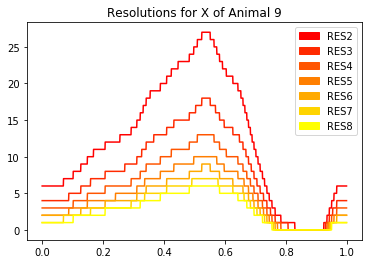

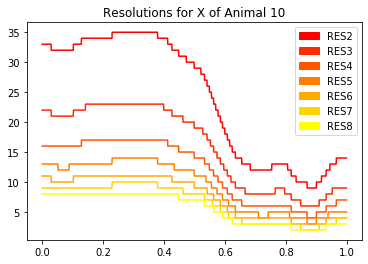

In [40]:
for i, animal_ls in enumerate(all_animals_res2):
    plotVarForAnimal (animal_ls, i, 'X', 'RES')

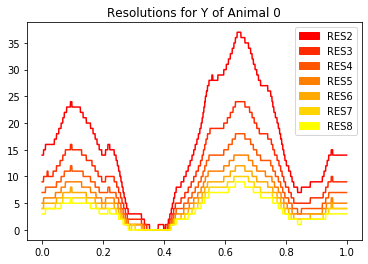

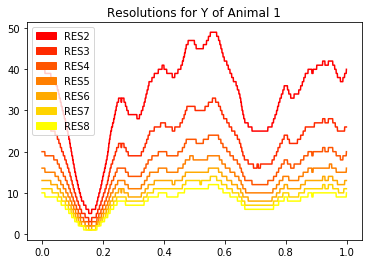

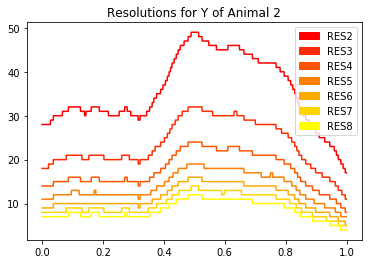

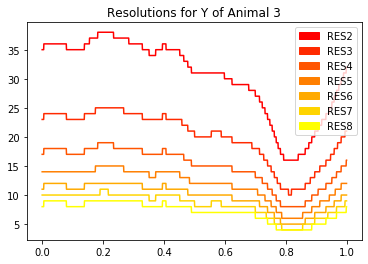

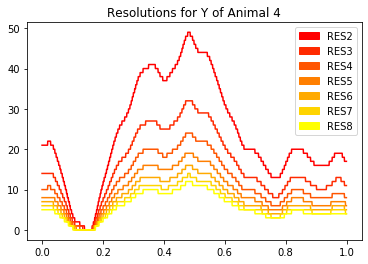

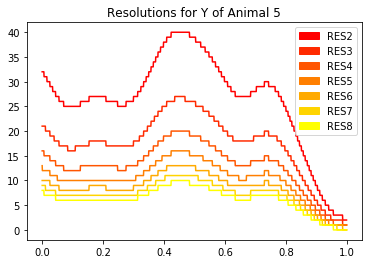

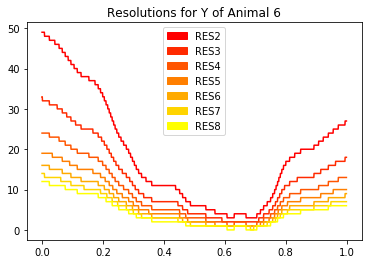

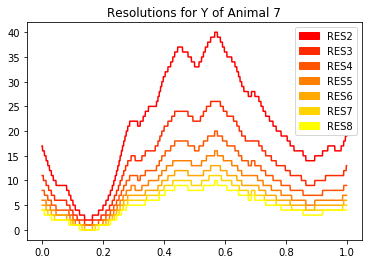

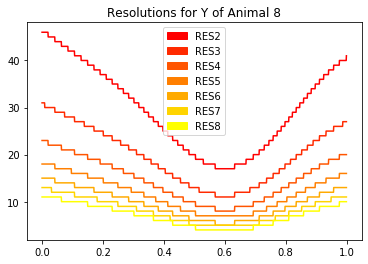

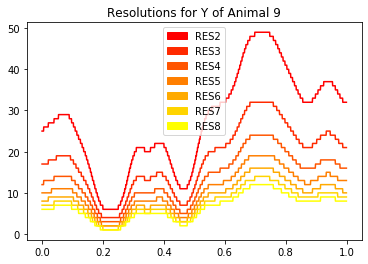

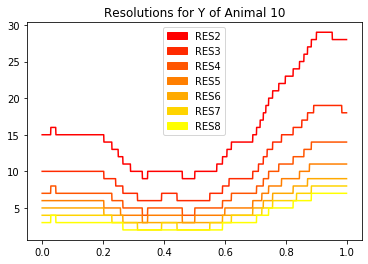

In [41]:
for i, animal_ls in enumerate(all_animals_res2):
    plotVarForAnimal (animal_ls, i, 'Y', 'RES')

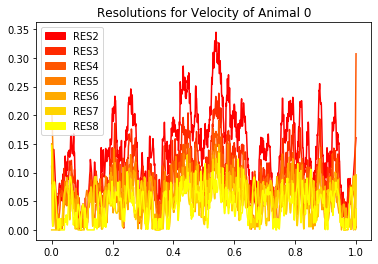

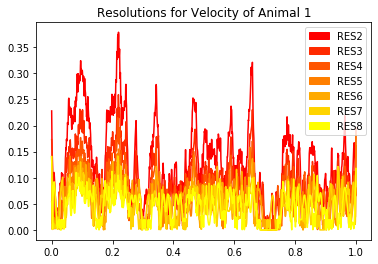

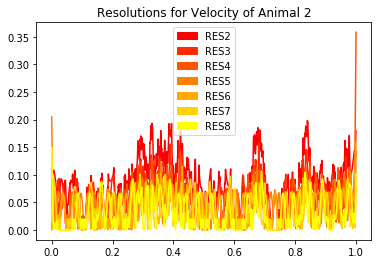

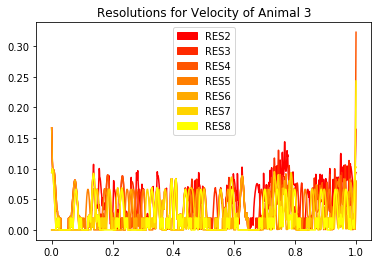

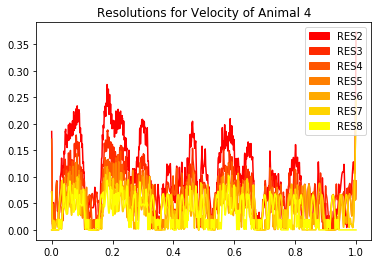

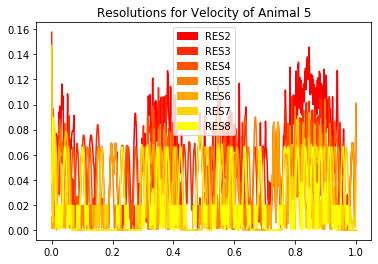

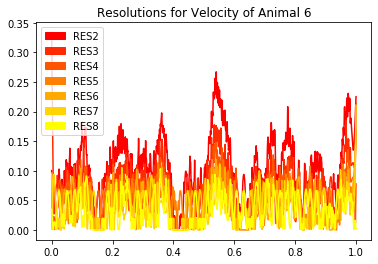

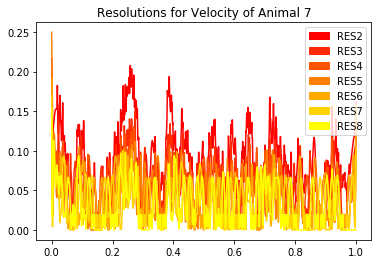

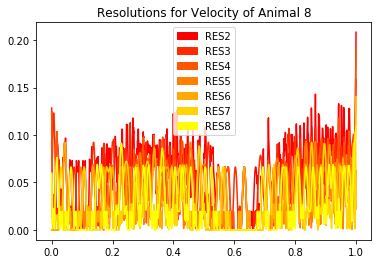

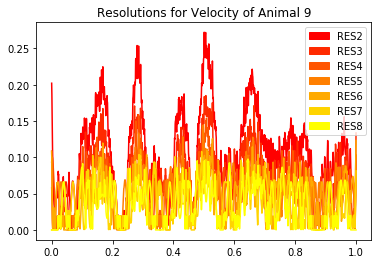

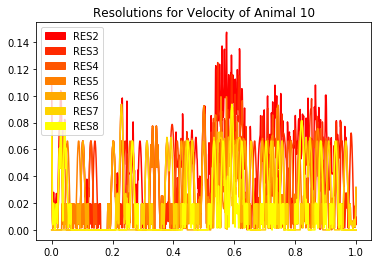

In [42]:
for i, animal_ls in enumerate(all_animals_res2):
    plotVarForAnimal (animal_ls, i, 'Velocity', 'RES')

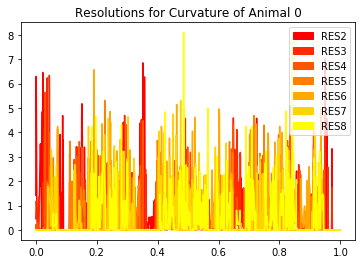

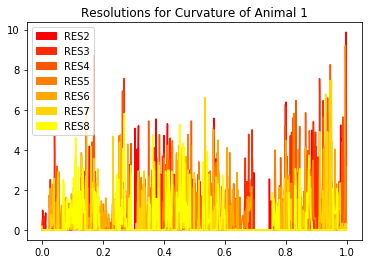

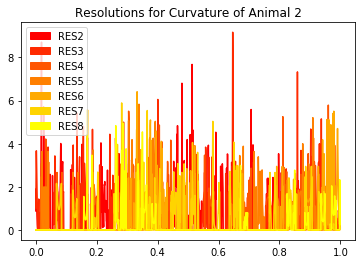

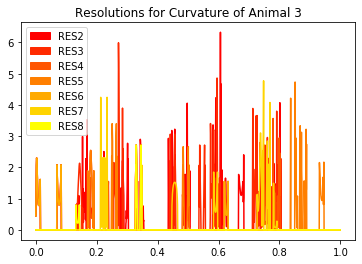

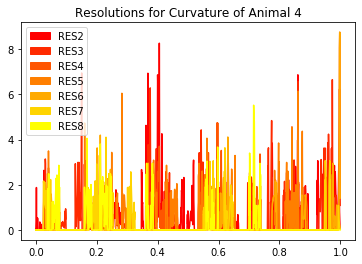

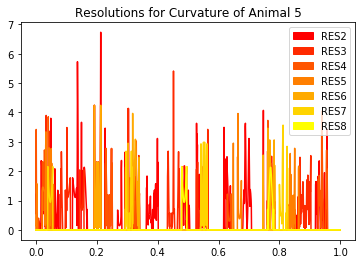

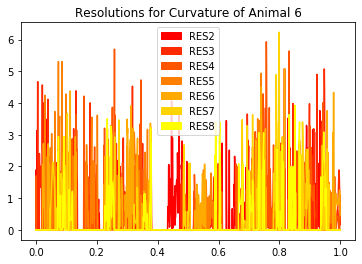

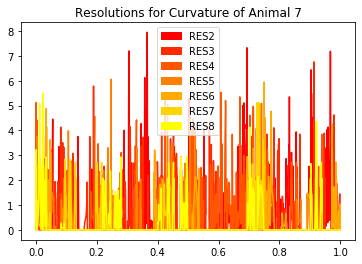

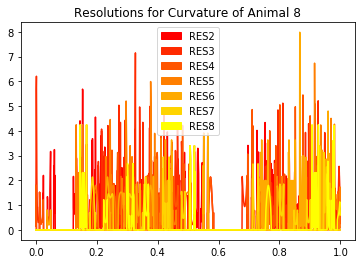

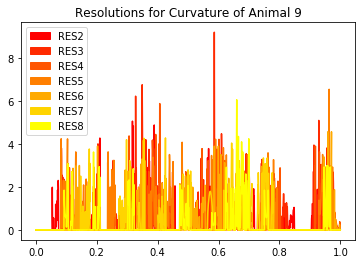

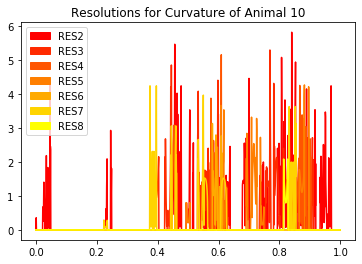

In [43]:
for i, animal_ls in enumerate(all_animals_res2):
    plotVarForAnimal (animal_ls, i, 'Curvature', 'RES')